#### **NAME**: DUKUNDIMANA CLOVIS
#### **ID**: 27122
#### **Course**: Introduction to Big Data Analytics, Group: E

#### **FINAL EXAM PROJECT**
#### **PROJECT TITLE**: Predict Students Dropout and Academic Success
#### **PROJECT SECTOR**: Education

___


### Python Analytics Tasks
* Clean the dataset
* Perform EDA
* Apply ML model
* Evaluate the model
* Structure code properly
* Add innovation

* ## Load and Inspect Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# 1. Load and Inspect Dataset

file_path = "structured_data.csv"
df = pd.read_csv(file_path)

print("Initial Shape:", df.shape)
print("First 5 Rows:")
df.head()

Initial Shape: (4424, 37)
First 5 Rows:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 1. Data Cleaning
Handel missing value, inconsistent formats and outliers

In [2]:
#  Data Cleaning

# Handle Missing Values
df.fillna(method='ffill', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Detect & Handle Outliers (Z-score method)
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]

* ## Encode Categorical Variables
  Apply necessary data transformations

In [3]:
# Encode Categorical Variables

cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

* ## Feature Scaling
Apply necessary data transformations

In [4]:
# Feature Scaling

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## 2. Exploratory Data Analysis (EDA)
Generata descriptive statistics and Visualize distributions and relationships among variables. 


Descriptive Statistics:
       Marital status  Application mode  Application order        Course  \
count    3.081000e+03      3.081000e+03       3.081000e+03  3.081000e+03   
mean     4.335671e-16     -1.383725e-17       2.536829e-17  3.828306e-16   
std      1.000162e+00      1.000162e+00       1.000162e+00  1.000162e+00   
min     -2.984584e-01     -9.174643e-01      -6.123284e-01 -3.407150e+00   
25%     -2.984584e-01     -9.174643e-01      -6.123284e-01 -5.784966e-01   
50%     -2.984584e-01      7.297280e-02      -6.123284e-01 -2.642018e-01   
75%     -2.984584e-01      1.434824e+00       2.538717e-01  7.902065e-01   
max      3.350551e+00      2.301456e+00       2.852472e+00  1.603824e+00   

       Daytime/evening attendance\t  Previous qualification  \
count                  3.081000e+03            3.081000e+03   
mean                  -5.073658e-17            5.765520e-18   
std                    1.000162e+00            1.000162e+00   
min                   -3.126136e+00   

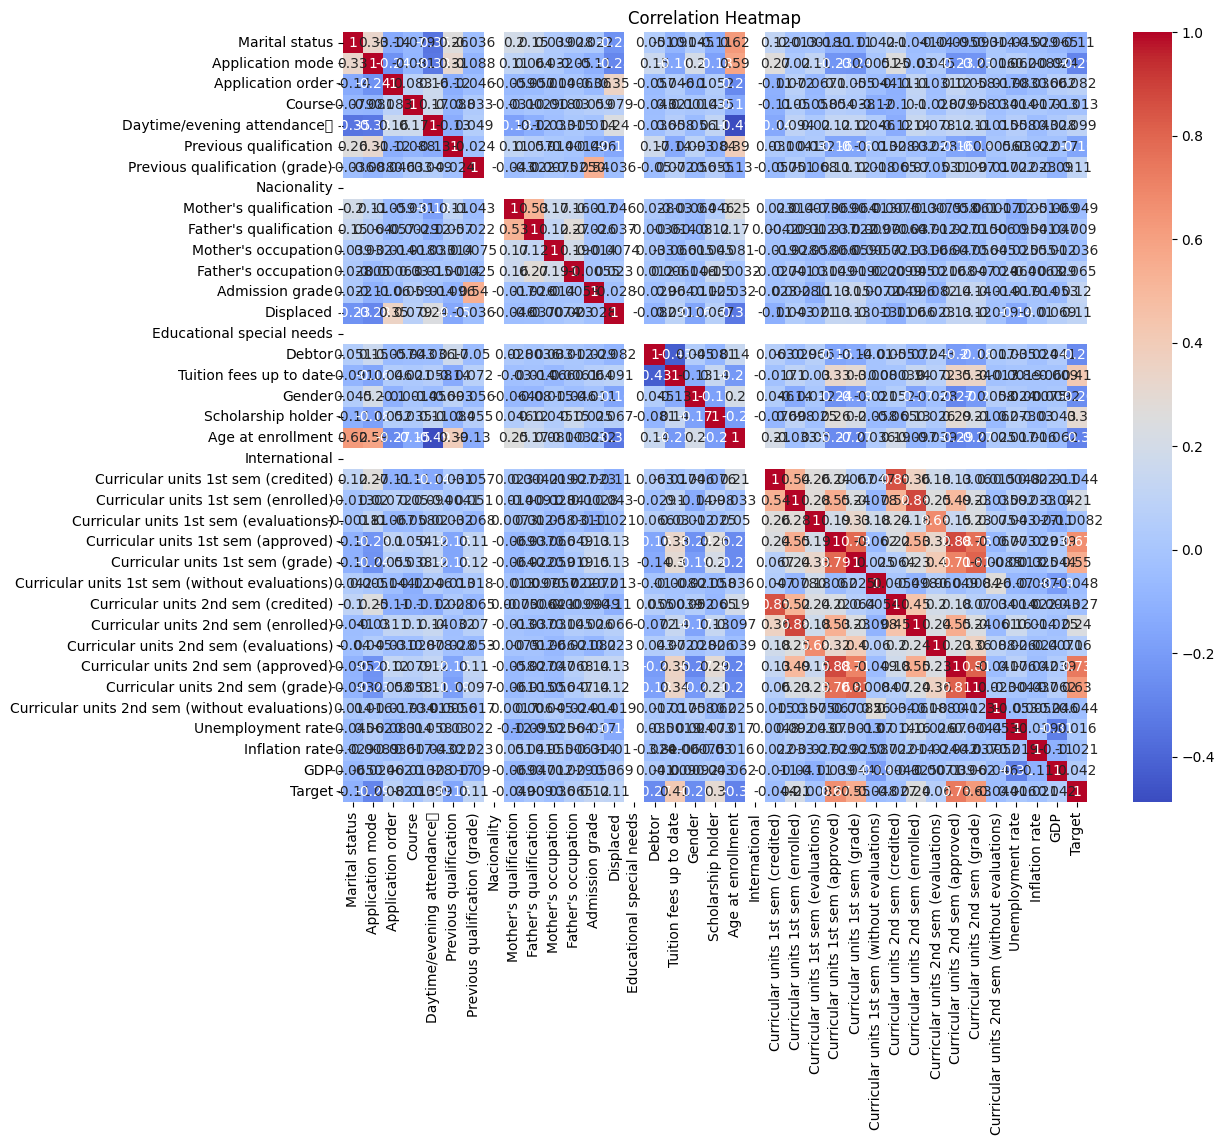

In [7]:
# Exploratory Data Analysis (EDA)

print("\nDescriptive Statistics:")
print(df.describe())

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


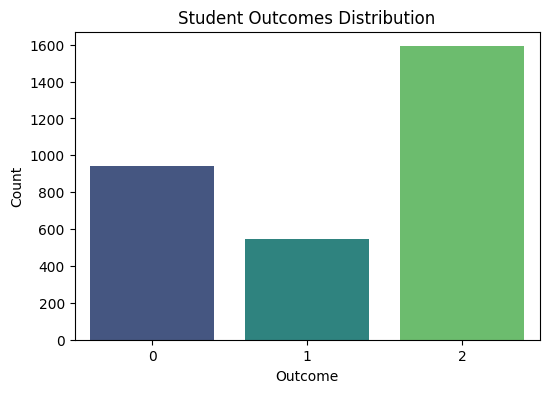

In [14]:
# - Target Outcome Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df, palette='viridis')
plt.title("Student Outcomes Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

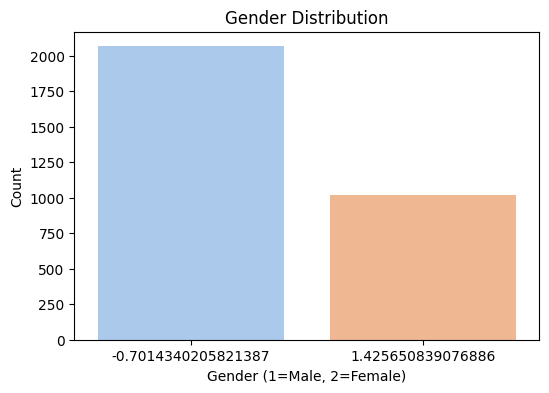

In [15]:
# - Gender Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender (1=Male, 2=Female)")
plt.ylabel("Count")
plt.show()

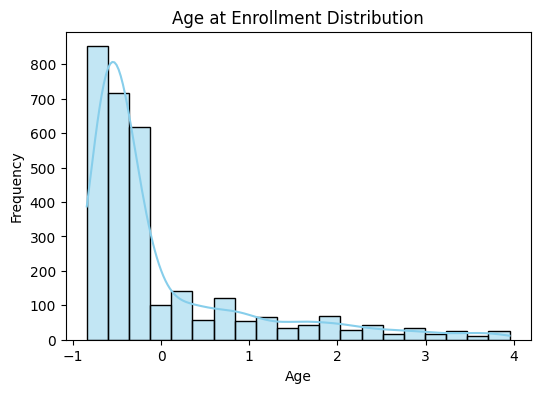

In [16]:
# - Age at Enrollment

plt.figure(figsize=(6,4))
sns.histplot(df['Age at enrollment'], kde=True, bins=20, color='skyblue')
plt.title("Age at Enrollment Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

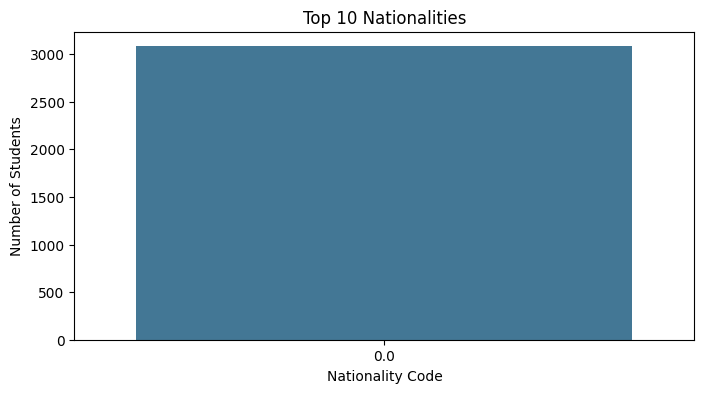

In [17]:
# - Top 10 Nationalities

top_nations = df['Nacionality'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_nations.index, y=top_nations.values, palette='mako')
plt.title("Top 10 Nationalities")
plt.xlabel("Nationality Code")
plt.ylabel("Number of Students")
plt.show()

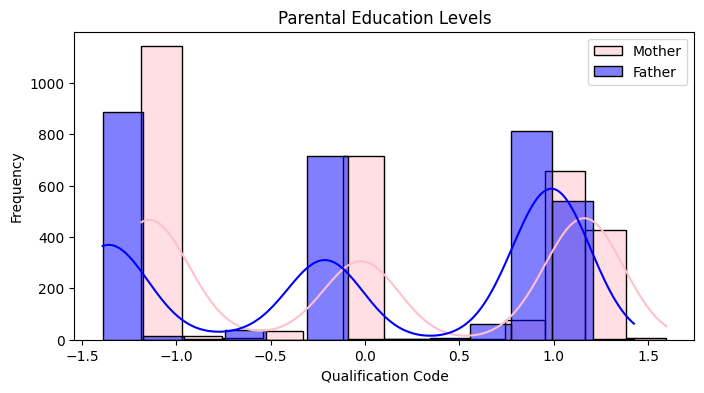

In [18]:
# - Mother's vs Father's Qualification

plt.figure(figsize=(8,4))
sns.histplot(df['Mother\'s qualification'], color='pink', label='Mother', kde=True)
sns.histplot(df['Father\'s qualification'], color='blue', label='Father', kde=True)
plt.legend()
plt.title("Parental Education Levels")
plt.xlabel("Qualification Code")
plt.ylabel("Frequency")
plt.show()

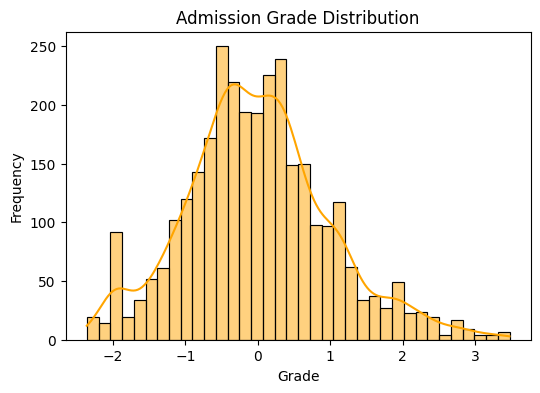

In [19]:
# - Admission Grade Distribution

plt.figure(figsize=(6,4))
sns.histplot(df['Admission grade'], kde=True, color='orange')
plt.title("Admission Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

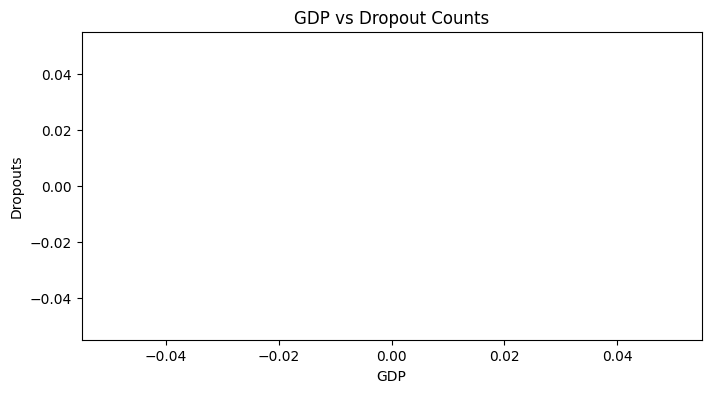

In [20]:
# - GDP vs Dropout Rate

gdp_dropout = df[df['Target'] == 'Dropout'].groupby('GDP').size()
plt.figure(figsize=(8,4))
gdp_dropout.plot(kind='line', marker='o', color='red')
plt.title("GDP vs Dropout Counts")
plt.xlabel("GDP")
plt.ylabel("Dropouts")
plt.show()

## 3. Apply Machine Learning or Clustering Model
Determine Task Type (Classification or Regression)

In [21]:
# Determine Task Type

target_col = df.columns[-1]
y = df[target_col]
X = df.drop(columns=[target_col])

if y.nunique() <= 10 and y.dtype in [np.int64, np.int32]:
    task_type = 'classification'
else:
    task_type = 'regression'

print(f"\nDetected Task Type: {task_type}")


Detected Task Type: classification


* ## Train-Test Split

In [22]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* ## Model Training

In [23]:
# Model Training

if task_type == 'classification':
    model = RandomForestClassifier(random_state=42)
else:
    model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 4. Model Evaluation
Evaluation metrics (RMSE)

Accuracy: 0.7811993517017828
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       199
           1       0.49      0.34      0.40       105
           2       0.82      0.95      0.88       313

    accuracy                           0.78       617
   macro avg       0.71      0.68      0.69       617
weighted avg       0.76      0.78      0.77       617



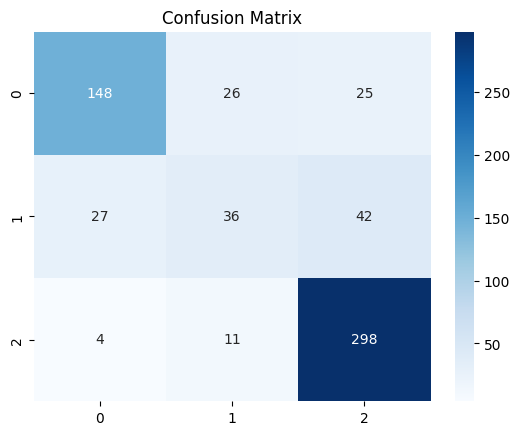

In [24]:
# Model Evaluation

y_pred = model.predict(X_test)

if task_type == 'classification':
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
else:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

## 6. Innovation - Feature Importance Plot

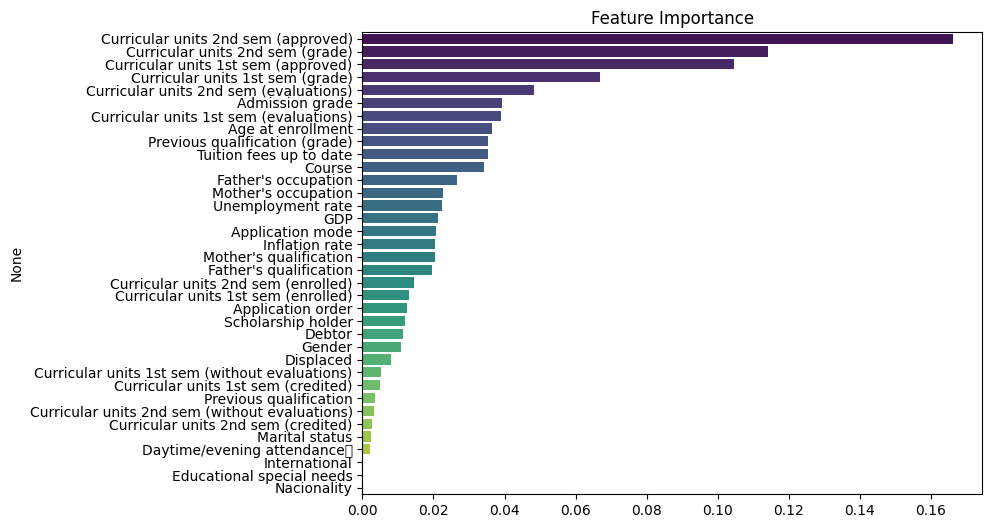

Cleaned dataset saved as cleaned_structured_data.csv


In [25]:
# Innovation: Feature Importance Plot

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title("Feature Importance")
plt.show()

# Save Cleaned Data
df.to_csv("cleaned_structured_data.csv", index=False)
print("Cleaned dataset saved as cleaned_structured_data.csv")
